In [91]:
import pandas as pd
import numpy as np

In [92]:
excel_data_df = pd.ExcelFile(r'../data/nha.xlsx')
excel_data_df = excel_data_df.parse(excel_data_df.sheet_names[3])

In [93]:

for idx, header in enumerate(excel_data_df.columns.tolist()):
    print(idx, header)

0 STT
1 ID
2 Heure de début
3 Heure de fin
4 Adresse de messagerie
5 Nom
6 Total points
7 Quiz feedback
8 Họ và tên của bạn
9 Points - Họ và tên của bạn
10 Feedback - Họ và tên của bạn
11 Ngày sinh của bạn
12 Points - Ngày sinh của bạn
13 Feedback - Ngày sinh của bạn
14 Giới tính của bạn
15 Points - Giới tính của bạn
16 Feedback - Giới tính của bạn
17 Bạn đang học tại Trường Đại học/Cao đẳng nào?
18 Points - Bạn đang học tại Trường Đại học/Cao đẳng nào?
19 Feedback - Bạn đang học tại Trường Đại học/Cao đẳng nào?
20 Bạn là sinh viên năm mấy?
21 Points - Bạn là sinh viên năm mấy?
22 Feedback - Bạn là sinh viên năm mấy?
23 Lớp chuyên ngành của bạn
24 Points - Lớp chuyên ngành của bạn
25 Feedback - Lớp chuyên ngành của bạn
26 Mã sinh viên
27 Points - Mã sinh viên
28 Feedback - Mã sinh viên
29 Địa chỉ email cá nhân
30 Points - Địa chỉ email cá nhân
31 Feedback - Địa chỉ email cá nhân
32 Số điện thoại
33 Points - Số điện thoại
34 Feedback - Số điện thoại
35 Địa chỉ nơi ở hiện tại
36 Points -

In [101]:
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Nhân sự")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Đối ngoại")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Chuyên môn")]
excel_data_df.fillna("", inplace = True)
# identity = list(excel_data_df.index.values)
identity = excel_data_df.loc[:, "ID"].tolist()

In [95]:
import sys; sys.path.insert(0, '..')
from app.loader import loader
from app.ssmc_fcm import SSMC_FCM

In [96]:
fields_chosen = [
    (40, loader.feature_engineering, 1),
    (43, loader.feature_engineering, 1),
    (46, loader.feature_engineering, 1),
    (49, loader.feature_engineering, 1),
    
    (74, loader.feature_engineering, 1),
    (77, loader.feature_engineering, 1),
    (80, loader.feature_engineering, 1),
]

In [97]:
dataset = None
data_field_len = []
data_field_weight = []
for idx, func, w in fields_chosen:
    raw_data = excel_data_df.iloc[:, idx].tolist()
    data = func(raw_data)
    dataset = data if dataset is None else np.hstack((dataset, data))
    data_field_len.append(data.shape[1])
    data_field_weight.append(w)
dataset.shape, data_field_len, data_field_weight

((66, 5376), [768, 768, 768, 768, 768, 768, 768], [1, 1, 1, 1, 1, 1, 1])

Supervised percentage: 0.0% (0:66)
Cluster members: 
[12, 28, 30, 33, 41, 44, 48, 58, 64, 86, 89, 96, 108, 112, 118, 127, 129, 124, 133, 143, 146, 159, 160, 161, 162, 169, 170, 143, 150, 165, 174, 176, 179, 184, 194, 197, 204, 206, 219]
[23, 34, 35, 38, 54, 61, 66, 68, 70, 71, 72, 77, 83, 79, 116, 119, 109, 117, 157, 149, 163, 177]
[]
[47, 178]
[73, 153, 223]


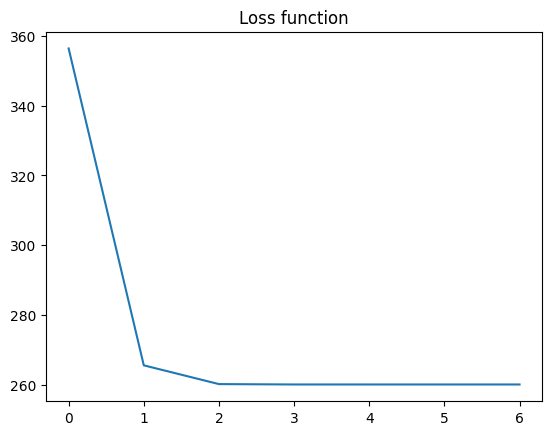

loss functions: 
[356.425343975206, 265.5089039543861, 260.12716291329326, 260.0193453537035, 260.01808803145457, 260.0180680306209, 260.018072105872]


In [109]:
supervised_set = [
]
ssmc_fcm = SSMC_FCM(
    dataset=dataset, 
    fields_len=data_field_len,
    fields_weight=data_field_weight,
    # fields_weight=[3, 1, 1, 3, 1],
    n_clusters=5, 
    identity=identity,
    supervised_set=supervised_set, 
)
ssmc_fcm.clustering()
ssmc_fcm.show_cluster_members()
ssmc_fcm.show_loss_function()

In [110]:
result_df = pd.ExcelFile(r'../data/nha-result.xlsx')
result_df = result_df.parse(result_df.sheet_names[2])
res = result_df.iloc[:, 1].tolist()

In [111]:
identity_mapping = {iden: idx for idx, iden in enumerate(identity)}
for cluster in ssmc_fcm.pred_labels:
    count = sum([cluster.count(x) for x in res])
    print(f"Accuracy: {round(100 * count / len(res), 2)}% ({count} in {len(cluster)})")
    # display(excel_data_df.loc[[identity.index(i) for i in cluster]].iloc[:, [1, *[i[0] for i in fields_chosen]]])

Accuracy: 72.0% (36 in 39)
Accuracy: 10.0% (5 in 22)
Accuracy: 0.0% (0 in 0)
Accuracy: 0.0% (0 in 2)
Accuracy: 4.0% (2 in 3)
